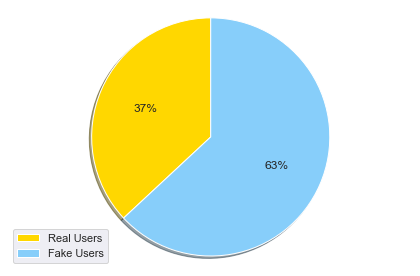

In [18]:
import load_baseline_train_data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df = load_baseline_train_data.get_baseline_data('training_users.csv')


labels = ['Real Users','Fake Users']
vs = df['label'].value_counts()
sizes = [vs[0],vs[1]]
colors = ['gold', 'lightskyblue']
patches, texts,p = plt.pie(sizes, colors=colors, shadow=True, startangle=90,autopct='%1.0f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

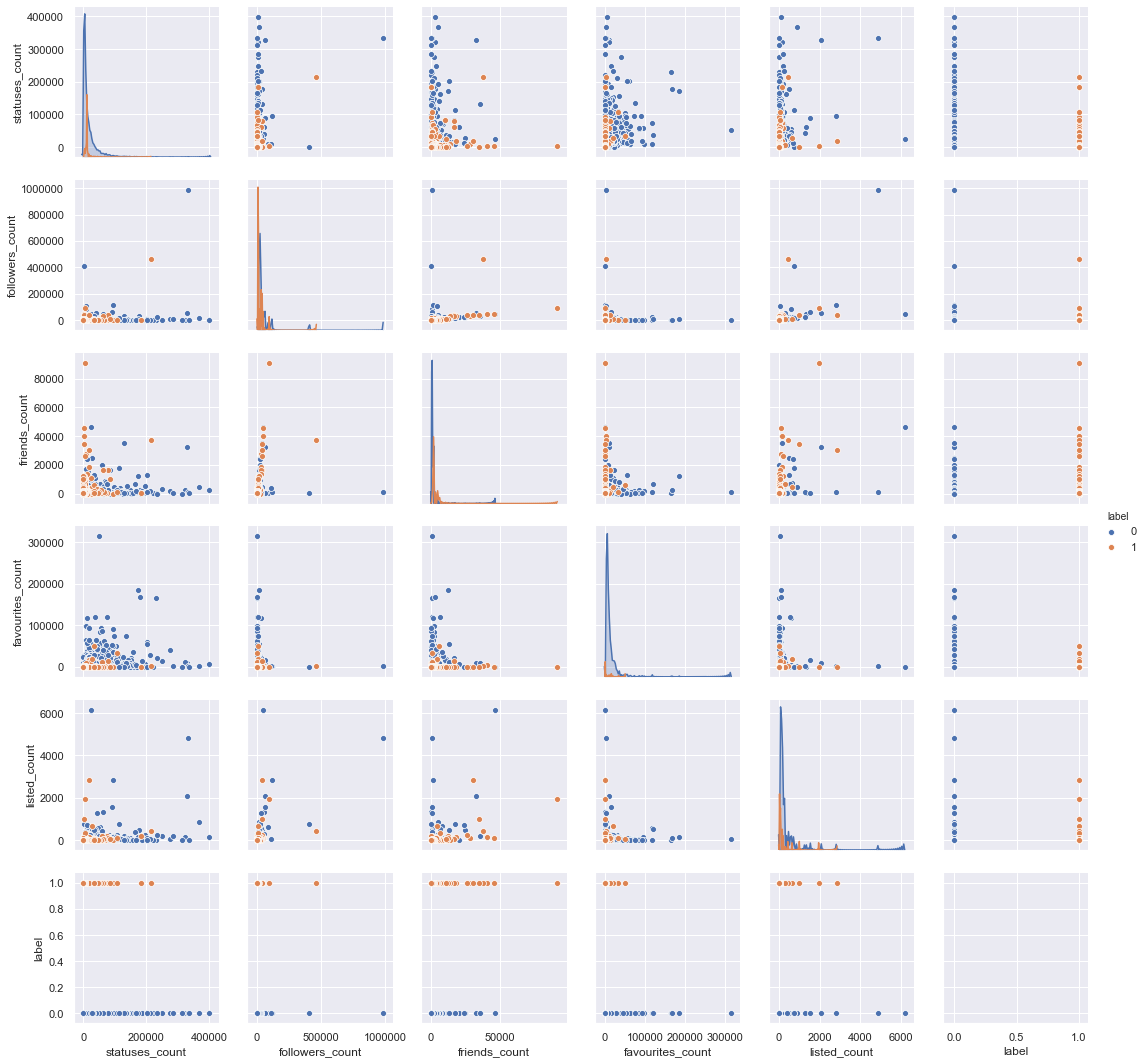

In [25]:
# Pirplot relations
df.columns.values
ax = sns.pairplot(df[['statuses_count','followers_count','friends_count','favourites_count','listed_count','label']],hue='label')
plt.show()

In [26]:
# Reading the users with their tweets
tweetdf = pd.read_csv('training_user_tweet.csv')

In [34]:
# Remove NaN tweets
tweetdf = tweetdf.dropna(subset=['tweet'])

In [35]:
tweetdf.head()

id               name      screen_name  statuses_count  \
3    191839658  pocahontas farida      wadespeters          202968   
5   2157382005                 JO     19_Joanne_87           12915   
6   1947320929          ❄McKayla❄  1Dniallprincess           13676   
8   1733095801      Nicole Romany    1Nicoleromany            4854   
12    21959183      Randee Deason          2hip4tv           10354   

    followers_count  friends_count  favourites_count  listed_count  \
3              2248            981             60304           101   
5               641           1066              1568             7   
6              1042           2000             19012             7   
8               337            256              1407             4   
12             1948           2096                 3            88   

                       url lang  ... profile_link_color utc_offset  protected  \
3   http://t.co/rGV0HIJGsu   en  ...             088253    -7200.0        NaN   
5                      NaN   en  ...             9266CC   -18000.0        NaN   
6                      NaN   en  ...             0084B4        NaN        NaN   
8                      NaN   en  ...             0084B4        NaN        NaN   
12  http://t.co/mtQ3mK85p6   en  ...             4A9991   -25200.0        NaN   

    verified                                        description  \
3        NaN  20. menna: #farida #nyc and the 80s actually y...   
5        NaN  CHRISTIAN -Communication degree -graphic desig...   
6        NaN              Live, Young, Wild and Free #crazymofo   
8        NaN                                                NaN   
12       NaN  KTVU Photojournalist looking for the scoop.  N...   

                        created_at              updated     file label  \
3   Fri Sep 17 14:02:10 +0000 2010  2016-03-15 15:53:48  hum1_us     0   
5   Mon Oct 28 16:08:18 +0000 2013  2016-03-15 15:53:49  hum1_us     0   
6   Tue Oct 08 15:59:30 +0000 2013  2016-03-15 15:53:49  hum1_us     0   
8   Thu Sep 05 20:52:02 +0000 2013  2016-03-15 15:53:50  hum1_us     0   
12  Thu Feb 26 02:33:21 +0000 2009  2016-03-15 15:53:51  hum1_us     0   

                                                tweet  
3   rt @steviebuckys: do i look aesthetic yet http...  
5   rt @biblicaltweets_: a pocket full of cuteness...  
6   rt @taylorbauerkemp: the worst feeling http://...  
8   @clydeenmcdonald thanks hun. i actually just a...  
12  @sal_castaneda, smoke signals for request? how...  

[5 rows x 36 columns]

In [44]:
genuinetweedf = tweetdf.loc[tweetdf['label']==0]
facketweetdf = tweetdf.loc[tweetdf['label']==1]

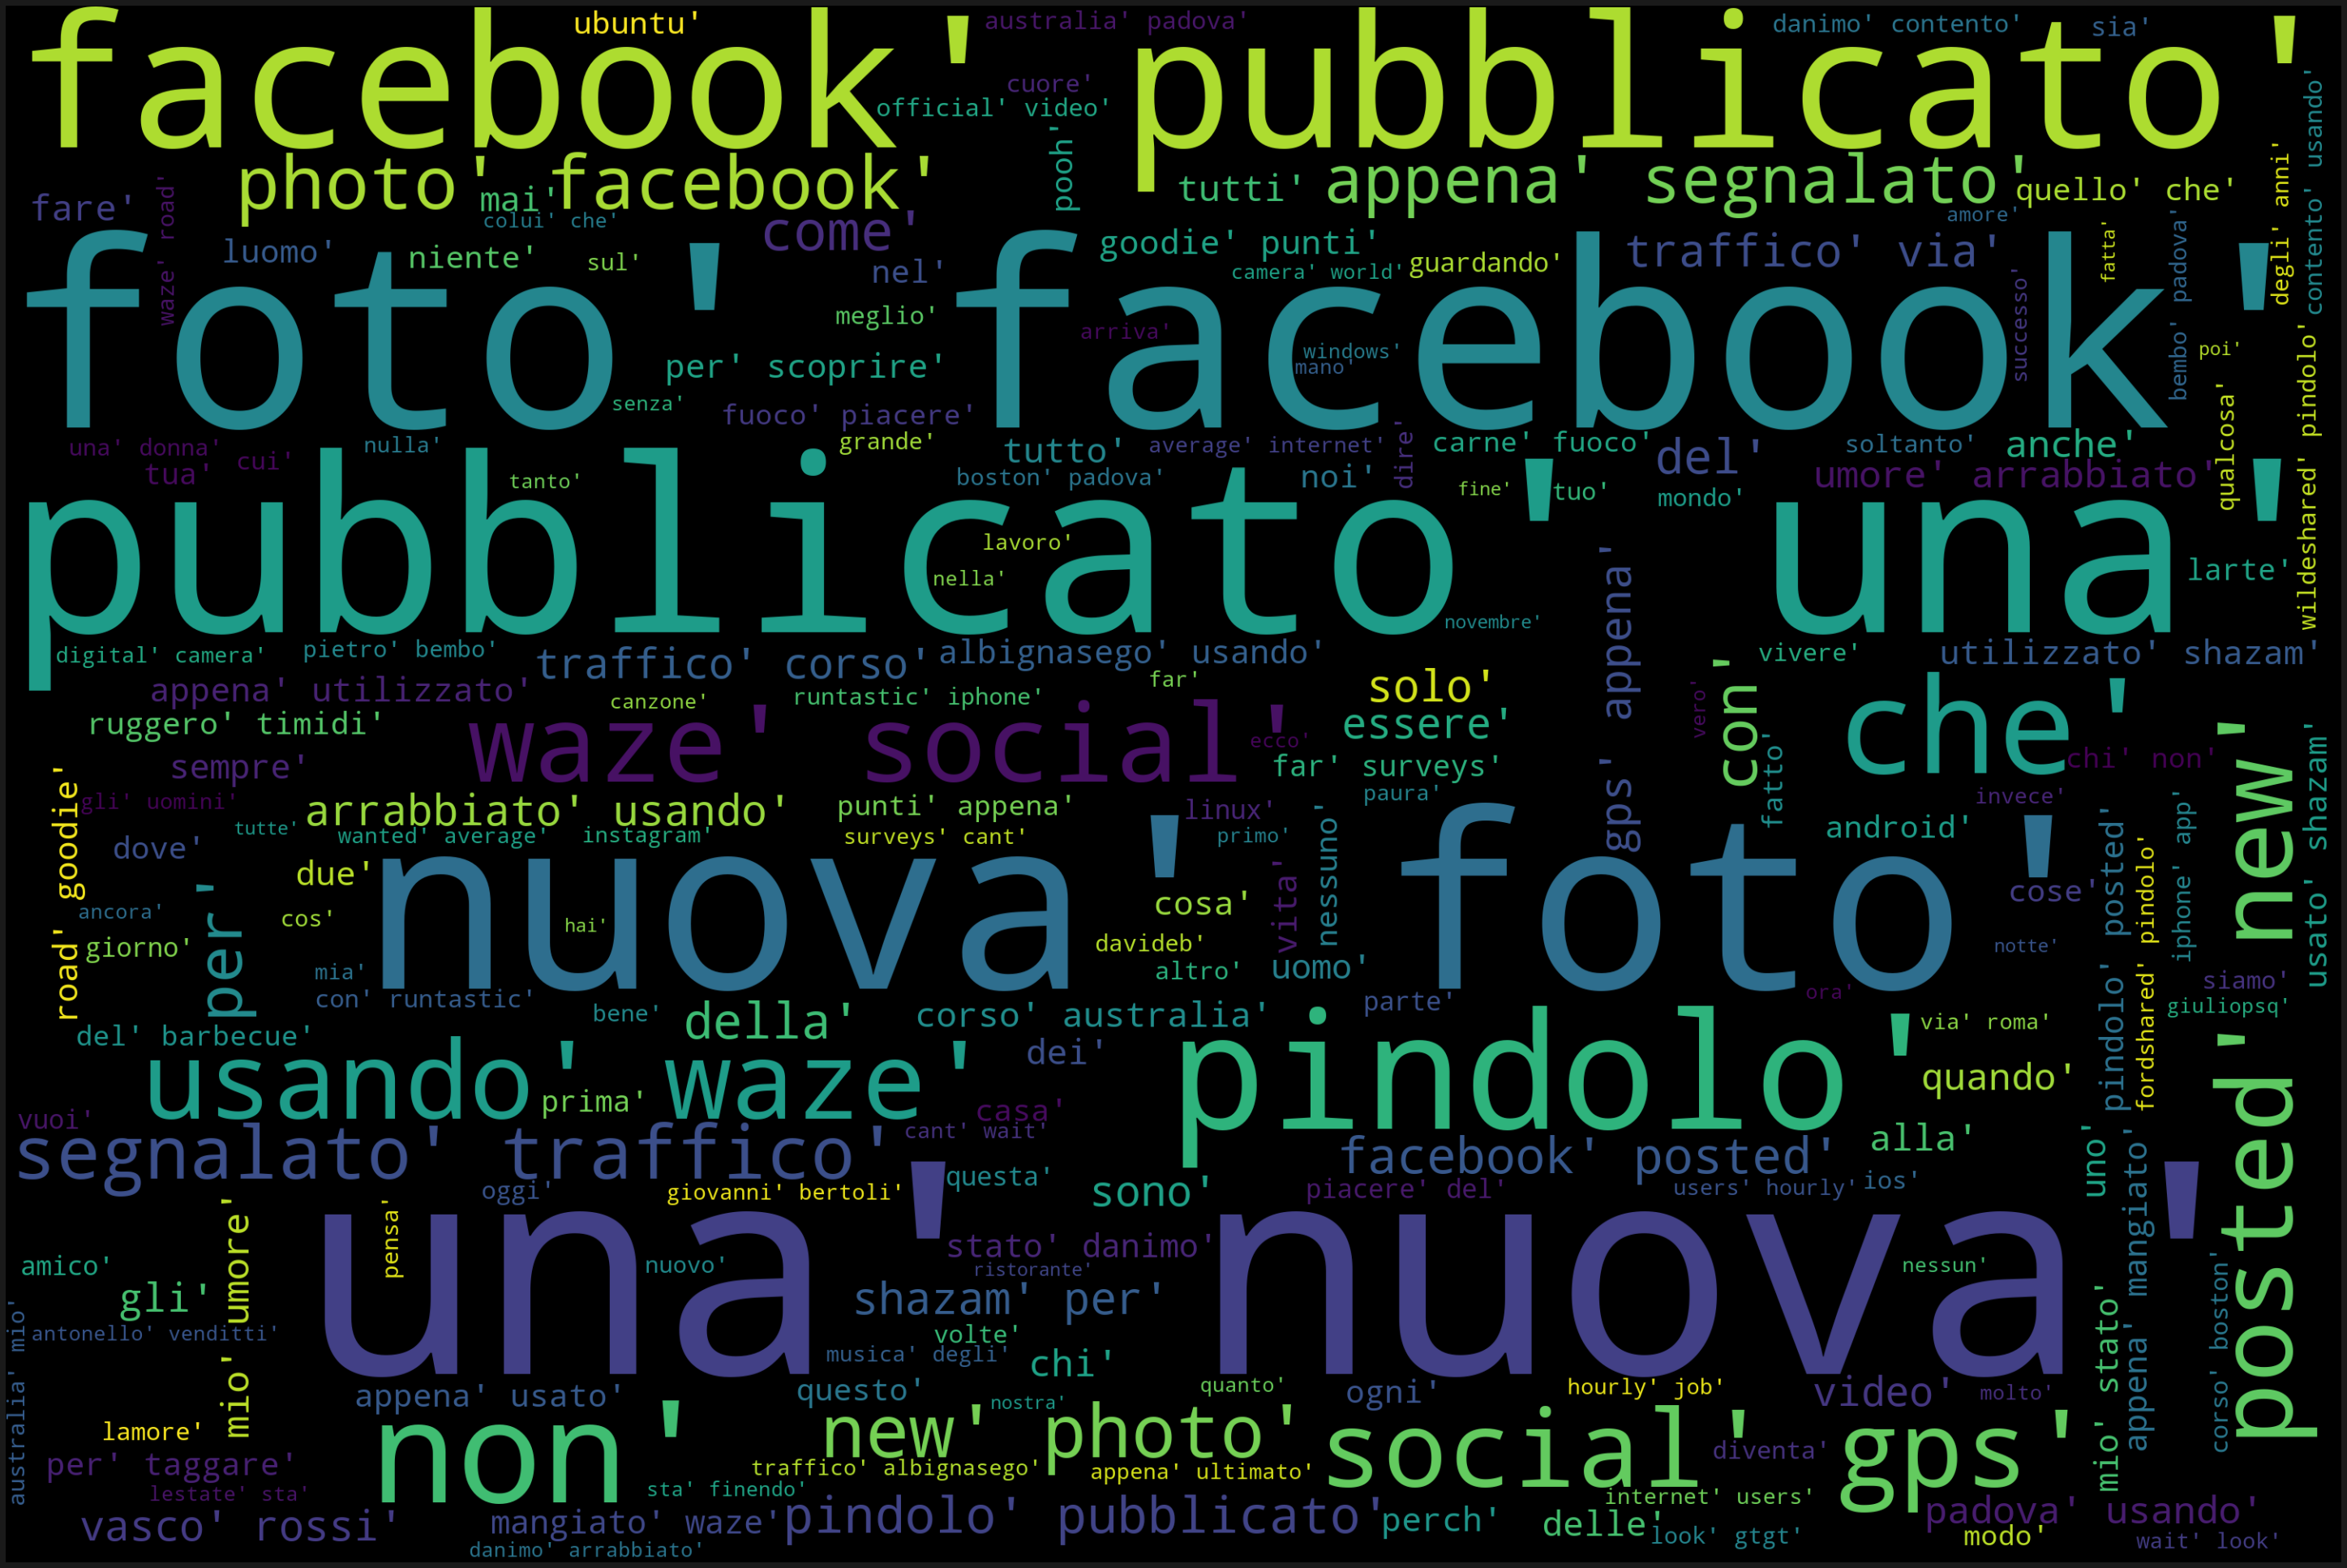

In [61]:
from wordcloud import WordCloud, STOPWORDS
import re


def clean_tweet(text):
    #Create a string form of our list of text
    raw_string = ''.join(text)
    no_links = re.sub(r'http\S+', '', raw_string)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    words = no_special_characters.split(" ")
    words = [w for w in words if len(w) > 2]  
    words = [w.lower() for w in words]
    words = [w for w in words if w not in STOPWORDS]
    return words




text = clean_tweet(facketweetdf['tweet'].values[0])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

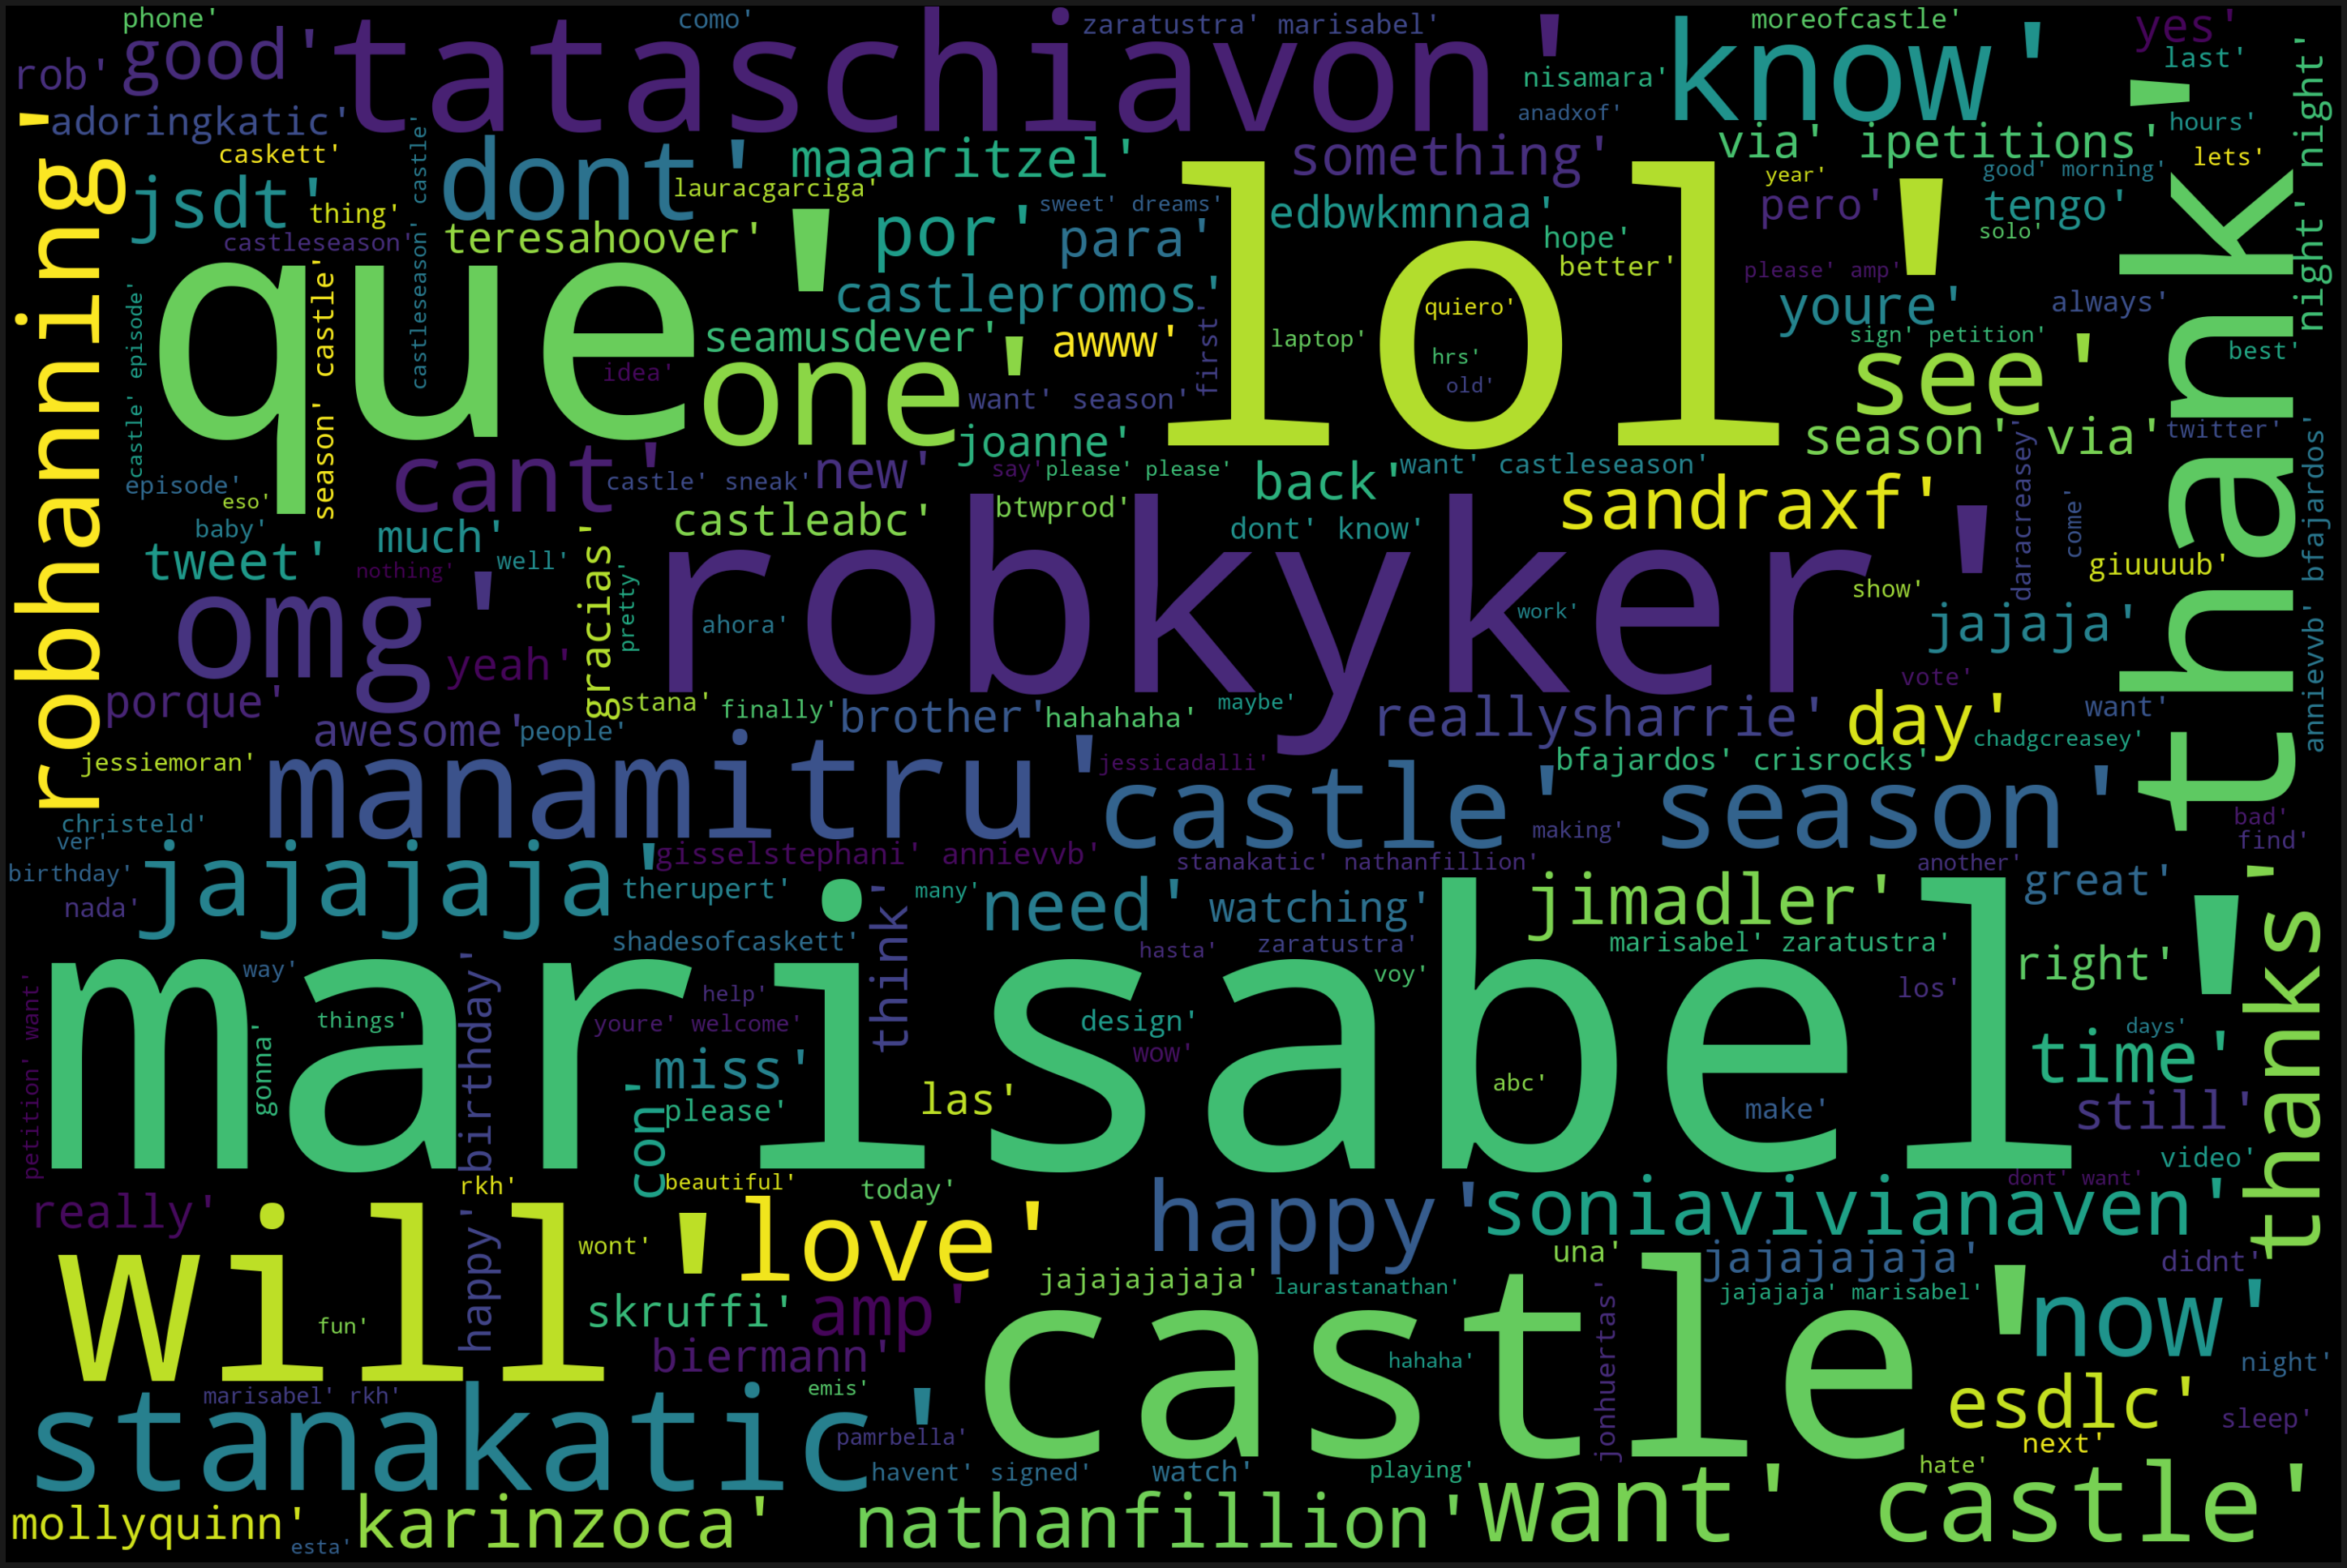

In [63]:
text = clean_tweet(genuinetweedf['tweet'].values[1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [65]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/d6/9e/6a42486ffa64711fb868e5d4a9167153417e7414c3d8d3e0d627cf391e1e/scikit_learn-0.21.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/8f/42/155696f85f344c066e17af287359c9786b436b1bf86029bb3411283274f3/joblib-0.14.0-py2.py3-none-any.whl


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [67]:
tweetdf.head()

id               name      screen_name  statuses_count  \
3    191839658  pocahontas farida      wadespeters          202968   
5   2157382005                 JO     19_Joanne_87           12915   
6   1947320929          ❄McKayla❄  1Dniallprincess           13676   
8   1733095801      Nicole Romany    1Nicoleromany            4854   
12    21959183      Randee Deason          2hip4tv           10354   

    followers_count  friends_count  favourites_count  listed_count  \
3              2248            981             60304           101   
5               641           1066              1568             7   
6              1042           2000             19012             7   
8               337            256              1407             4   
12             1948           2096                 3            88   

                       url lang  ... profile_link_color utc_offset  protected  \
3   http://t.co/rGV0HIJGsu   en  ...             088253    -7200.0        NaN   
5                      NaN   en  ...             9266CC   -18000.0        NaN   
6                      NaN   en  ...             0084B4        NaN        NaN   
8                      NaN   en  ...             0084B4        NaN        NaN   
12  http://t.co/mtQ3mK85p6   en  ...             4A9991   -25200.0        NaN   

    verified                                        description  \
3        NaN  20. menna: #farida #nyc and the 80s actually y...   
5        NaN  CHRISTIAN -Communication degree -graphic desig...   
6        NaN              Live, Young, Wild and Free #crazymofo   
8        NaN                                                NaN   
12       NaN  KTVU Photojournalist looking for the scoop.  N...   

                        created_at              updated     file label  \
3   Fri Sep 17 14:02:10 +0000 2010  2016-03-15 15:53:48  hum1_us     0   
5   Mon Oct 28 16:08:18 +0000 2013  2016-03-15 15:53:49  hum1_us     0   
6   Tue Oct 08 15:59:30 +0000 2013  2016-03-15 15:53:49  hum1_us     0   
8   Thu Sep 05 20:52:02 +0000 2013  2016-03-15 15:53:50  hum1_us     0   
12  Thu Feb 26 02:33:21 +0000 2009  2016-03-15 15:53:51  hum1_us     0   

                                                tweet  
3   rt @steviebuckys: do i look aesthetic yet http...  
5   rt @biblicaltweets_: a pocket full of cuteness...  
6   rt @taylorbauerkemp: the worst feeling http://...  
8   @clydeenmcdonald thanks hun. i actually just a...  
12  @sal_castaneda, smoke signals for request? how...  

[5 rows x 36 columns]

In [68]:
# Clustering of Genuine Tweet
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 4500,
    stop_words = 'english'
)
tfidf.fit(genuinetweedf.tweet)
text = tfidf.transform(genuinetweedf.tweet)


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


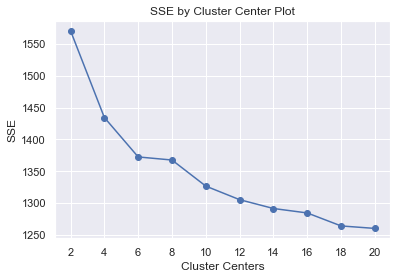

In [69]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [70]:
clusters = MiniBatchKMeans(n_clusters=20, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

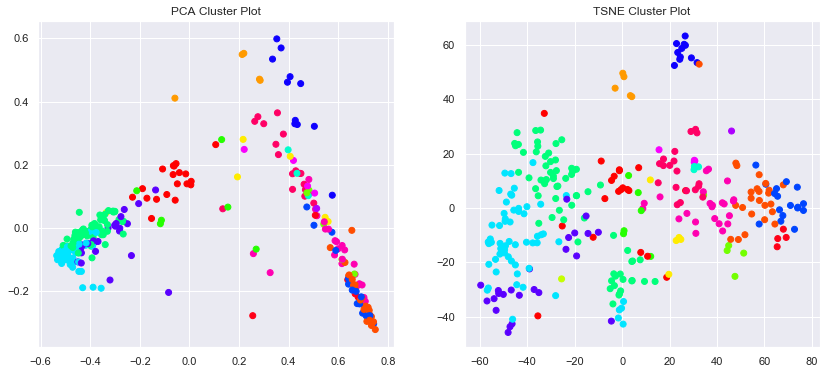

In [71]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    

In [72]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
da,le,si,una,del,non,che,la,il,di

Cluster 1
time,day,want,good,people,know,love,don,like,just

Cluster 2
más,las,para,los,por,es,la,el,en,que

Cluster 3
google,tinyurl,data,just,di,new,4sq,com,bit,ly

Cluster 4
si,non,mi,ma,la,il,nn,anke,di,ke

Cluster 5
sportscenter,https,don,time,today,good,amp,like,game,just

Cluster 6
mi,ho,la,piaciuto,che,youtu,il,video,di,youtube

Cluster 7
candidati,wikipedia,di,ringrazio,insopportabile,piã¹,al,sono,convinto,bindi

Cluster 8
ma,una,del,le,si,non,la,che,il,di

Cluster 9
just,new,people,https,modi,amp,indian,delhi,narendramodi,india

Cluster 10
sono,mi,si,una,ma,non,la,il,che,di

Cluster 11
lord,today,like,just,dan,aku,amp,jesus,yang,god

Cluster 12
nigga,https,got,love,fuck,don,shit,im,just,like

Cluster 13
yung,hahaha,sa,lang,ka,ako,ng,ko,na,ang

Cluster 14
una,si,sono,ma,mi,la,non,il,di,che

Cluster 15
just,follower,new,followed,followers,today,unfollower,unfollowers,cebu,stats

Cluster 16
na,ye,amp,ne,bi,ko,hai,ka,ki,pakistan

Clus

In [74]:
# CLustering of fake tweet
# Clustering of Genuine Tweet
tfidfFake = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 4500,
    stop_words = 'english'
)
tfidfFake.fit(facketweetdf.tweet)
textFake = tfidf.transform(facketweetdf.tweet)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


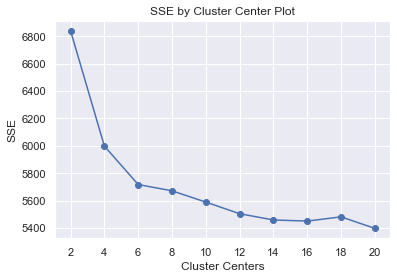

In [75]:
find_optimal_clusters(textFake, 20)

In [76]:
clustersFake = MiniBatchKMeans(n_clusters=20, init_size=1024, batch_size=2048, random_state=20).fit_predict(textFake)

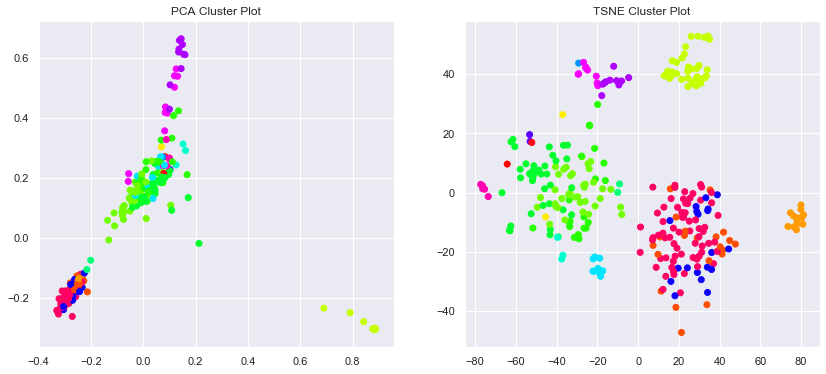

In [77]:
plot_tsne_pca(textFake, clustersFake)

In [79]:
get_top_keywords(textFake, clustersFake, tfidfFake.get_feature_names(), 10)


Cluster 0
nudo,hugh,control,miley,cooking,te,wallet,dello,harrison,pode

Cluster 1
kennedy,nei,book,list,dà,special,listening,culo,lou,não

Cluster 2
murphy,culo,list,sigaretta,berlusconi,lemon,gusto,citazioni,huge,retweet

Cluster 3
u0e41,phone,video,computer,educate,read,nudo,darts,www,control

Cluster 4
sem,silvio,specialmente,leggi,umano,land,indica,officer,dito,circuits

Cluster 5
track,piede,madonna,ezra,dicono,listening,greatest,ma,kennedy,read

Cluster 6
sem,meglio,trade,erma,divano,pensarci,praticamente,uma,ezra,read

Cluster 7
u0e41,xx,animali,dicono,greatest,listening,madonna,nudo,ma,kennedy

Cluster 8
torna,book,noite,greatest,dà,lack,ma,listening,kennedy,lou

Cluster 9
cornelius,lavoro,lunedì,pensarci,praticamente,eventually,land,er,read,esattamente

Cluster 10
pensarci,dicono,kennedy,listening,divano,ezra,ma,madonna,read,amano

Cluster 11
www,kennedy,u0e41,kahlil,control,bravo,nudo,murphy,maker,passione

Cluster 12
based,tasto,lower,daniel,grosso,dull,hang,kennedy,wear,f

In [81]:
# CLustering of all tweet
tfidfAll = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 4500,
    stop_words = 'english'
)
tfidfAll.fit(tweetdf.tweet)
textAll = tfidfAll.transform(tweetdf.tweet)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


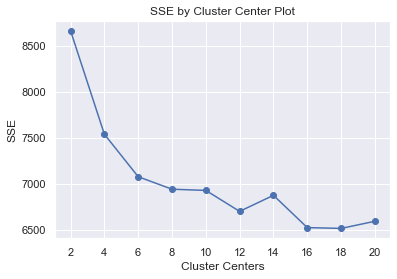

In [82]:
find_optimal_clusters(textAll, 20)

In [83]:
clustersAll = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(textAll)

In [114]:
cluster_dict = {}
rowCount = 0
for index, row in tweetdf.iterrows():
    if clustersAll[rowCount] in cluster_dict.keys():
        if(row['label']==0):
            cluster_dict[clustersAll[rowCount]][0]+=1
        else:
            cluster_dict[clustersAll[rowCount]][1]+=1
    else:
        cluster_dict[clustersAll[rowCount]] = [0,0]
    rowCount+=1
print(cluster_dict)

{6: [722, 116], 2: [343, 510], 15: [84, 2490], 9: [104, 267], 7: [49, 181], 10: [703, 11], 0: [884, 11], 14: [132, 957], 1: [0, 2422], 13: [0, 992], 3: [0, 394], 8: [0, 19], 5: [0, 496], 12: [0, 173], 4: [0, 19], 11: [0, 48]}


[13.842482100238662, 59.78898007033998, 96.73659673659674, 71.96765498652292, 78.69565217391305, 1.5406162464985995, 1.2290502793296088, 87.87878787878788, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


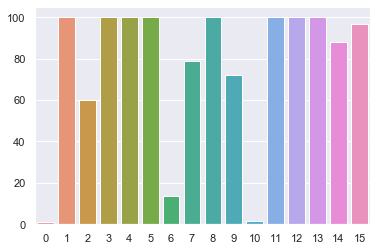

In [121]:

# Cluster Label Percentage as fake 
cluster_key = list(cluster_dict.keys())
cluster_fake_percentage = []
for key, value in cluster_dict.items():
    cluster_fake_percentage.append((value[1]/(value[0]+value[1]))*100)
print(cluster_fake_percentage)
ax = sns.barplot(x=cluster_key, y=cluster_fake_percentage)
plt.show()

In [122]:
get_top_keywords(textAll, clustersAll, tfidfAll.get_feature_names(), 10)


Cluster 0
una,si,ma,http,la,non,rt,il,che,di

Cluster 1
know,cool,just,don,music,like,life,lol,song,best

Cluster 2
today,great,com,just,bit,new,ly,video,rt,http

Cluster 3
biography,shoes,baseball,learn,great,check,introduction,history,read,http

Cluster 4
finish,add,hit,message,com,comment,talk,wanna,cute,guy

Cluster 5
mais,xe9,seguidores,followers,bit,maisfollowers,tinyurl,com,ly,http

Cluster 6
people,know,good,love,https,don,like,just,http,rt

Cluster 7
para,los,por,rt,es,http,la,en,que,el

Cluster 8
thomas,way,man,don,things,failure,success,business,jim,rohn

Cluster 9
know,day,don,people,good,love,like,just,http,rt

Cluster 10
si,del,una,non,la,che,il,di,rt,http

Cluster 11
ht,forex,2012,http,rt,что,на,не,дешевоайфон5,айфон

Cluster 12
cute,im,message,hey,add,comment,hit,com,guys,single

Cluster 13
just,cool,like,follow,don,music,song,life,best,lol

Cluster 14
si,ma,sono,le,una,la,il,non,di,che

Cluster 15
para,like,good,just,love,rt,lt,http,eu,que


In [84]:
fulldf = pd.read_csv('training_user_tweet.csv')

In [88]:
fulldf['tweet'] = fulldf['tweet'].fillna('$')

In [123]:
nullTweetdf = fulldf.loc[fulldf['tweet']=='$']

In [124]:
nullTweetdf['label'].value_counts()

0    2395
1     149
Name: label, dtype: int64

In [125]:
nullTweetdf = fulldf.loc[fulldf['tweet']!='$']

In [126]:
nullTweetdf['label'].value_counts()

1    9114
0    3029
Name: label, dtype: int64